In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv('clean_data.csv')
data.head()

,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,native-country,income,AgeCat,HoursPerWeekCat
0,Govt Employee,Bachelors,Single,Adm-clerical,White,Male,2174,0,North America,0,31-45,21-40
1,Self Employed,Bachelors,Married,Exec-managerial,White,Male,0,0,North America,0,46-60,1-20
2,Self Employed,High Grade,Separated,Handlers-cleaners,White,Male,0,0,North America,0,31-45,21-40
3,Self Employed,School,Married,Handlers-cleaners,Black,Male,0,0,North America,0,46-60,21-40
4,Self Employed,Bachelors,Married,Prof-specialty,Black,Female,0,0,North America,0,15-30,21-40


In [3]:
data.isnull().sum()

workclass          0
education          0
marital-status     0
occupation         0
race               0
sex                0
capital-gain       0
capital-loss       0
native-country     0
income             0
AgeCat             0
HoursPerWeekCat    0
dtype: int64

In [4]:
data_OneHot=pd.get_dummies(data, columns=['workclass','education','marital-status','occupation','race','sex','native-country', 'AgeCat', 'HoursPerWeekCat'])
data_OneHot.head()

,capital-gain,capital-loss,income,workclass_Govt Employee,workclass_Self Employed,workclass_Unemployed,education_Bachelors,education_College,education_Doctorate,education_High Grade,...,AgeCat_15-30,AgeCat_31-45,AgeCat_46-60,AgeCat_61-75,AgeCat_75+,HoursPerWeekCat_1-20,HoursPerWeekCat_21-40,HoursPerWeekCat_41-60,HoursPerWeekCat_61-80,HoursPerWeekCat_80+
0,2174,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Creating Independent and Dependent Variables

In [5]:
df=data_OneHot.copy()
X= df.drop('income', axis=1)
Y= df['income']
Y.head(1)

0    0
Name: income, dtype: int64

## Normailzation

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()

,capital-gain,capital-loss,workclass_Govt Employee,workclass_Self Employed,workclass_Unemployed,education_Bachelors,education_College,education_Doctorate,education_High Grade,education_Masters,...,AgeCat_15-30,AgeCat_31-45,AgeCat_46-60,AgeCat_61-75,AgeCat_75+,HoursPerWeekCat_1-20,HoursPerWeekCat_21-40,HoursPerWeekCat_41-60,HoursPerWeekCat_61-80,HoursPerWeekCat_80+
0,0.02174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
X.describe(include='all')

,capital-gain,capital-loss,workclass_Govt Employee,workclass_Self Employed,workclass_Unemployed,education_Bachelors,education_College,education_Doctorate,education_High Grade,education_Masters,...,AgeCat_15-30,AgeCat_31-45,AgeCat_46-60,AgeCat_61-75,AgeCat_75+,HoursPerWeekCat_1-20,HoursPerWeekCat_21-40,HoursPerWeekCat_41-60,HoursPerWeekCat_61-80,HoursPerWeekCat_80+
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.010777,0.020042,0.133626,0.865729,0.000645,0.164461,0.299131,0.012684,0.322502,0.052916,...,0.324683,0.379657,0.224041,0.064218,0.007401,0.089924,0.615829,0.260158,0.027702,0.006388
std,0.073854,0.092507,0.340255,0.340949,0.025388,0.370699,0.457884,0.111908,0.467441,0.223869,...,0.468263,0.485309,0.416956,0.245145,0.085714,0.286077,0.486406,0.438727,0.164120,0.079671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
xtrain, xtest, ytrain, ytest=train_test_split(X,Y, test_size=0.3, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(22792, 51) (22792,)
(9769, 51) (9769,)


In [10]:
ytest.value_counts()

0    7428
1    2341
Name: income, dtype: int64

## Defining Decision Tree classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf_dt = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=100)

In [13]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [14]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

### Task 5: Find accuracy for Decision Tree

In [15]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(ytest, dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8221926502200839


## Task 9: Print Classification Report for Decision Tree

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7428
           1       0.94      0.27      0.43      2341

    accuracy                           0.82      9769
   macro avg       0.88      0.63      0.66      9769
weighted avg       0.84      0.82      0.78      9769



In [18]:
classification_dt=classification_report(ytest,dt_pred, output_dict=True)
print(round(classification_dt['0']['precision'],2))
print(round(classification_dt['1']['precision'],2))
print(round(classification_dt['0']['recall'],2))
print(round(classification_dt['1']['recall'],2))
print(round(classification_dt['0']['f1-score'],2))
print(round(classification_dt['1']['f1-score'],2))
print(round(classification_dt['accuracy'],2))

0.81
0.94
0.99
0.27
0.89
0.43
0.82


## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, dt_pred)
confusion_matrix(ytest, dt_pred).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, dt_pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,642,1699
Not Survived,38,7390


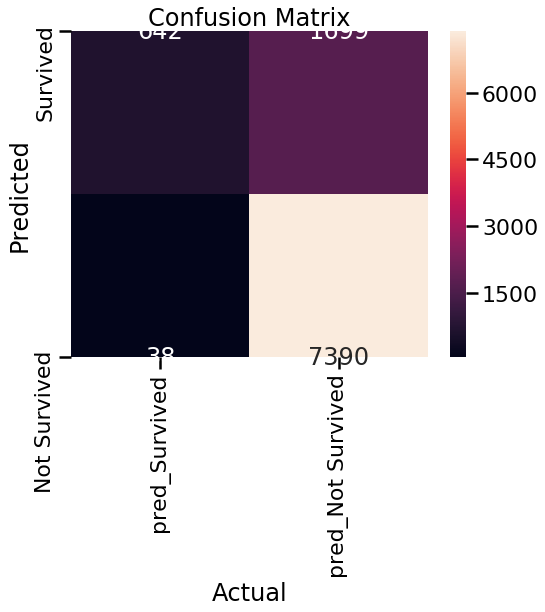

In [20]:
sns.set_context('poster')
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot= True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()


## ROC Curve

In [21]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [22]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

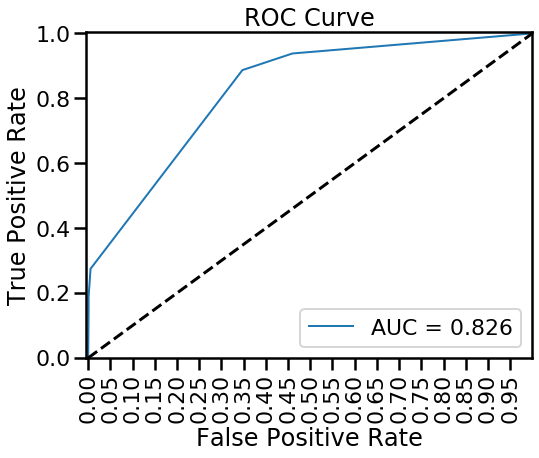

In [23]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

## Ploting Decision Tree

In [24]:
!pip install pydotplus

In [25]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [26]:
import os
os.environ["Path"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [27]:
dot_data = StringIO()

In [28]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

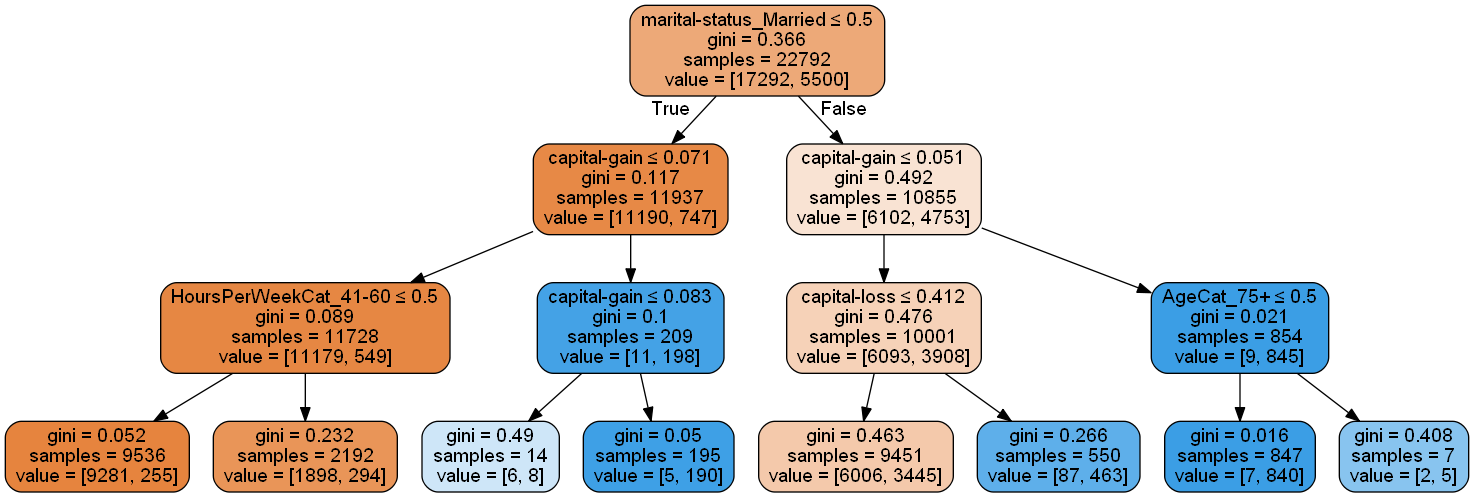

In [30]:
Image(graph.create_png())

In [31]:
graph.write_png('Decision Tree_Adult.png')

True

## Features Importance

In [32]:
clf_dt.feature_importances_

array([3.24028391e-01, 8.51347342e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.75676132e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.84244415e-04, 0.00000000e+00, 0.00000000e+00,
       1.47764985e-02, 0.00000000e+00, 0.00000000e+00])

In [33]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [34]:
features_tuple

[('capital-gain', 0.3240283909436633),
 ('capital-loss', 0.08513473423665338),
 ('workclass_Govt Employee', 0.0),
 ('workclass_Self Employed', 0.0),
 ('workclass_Unemployed', 0.0),
 ('education_Bachelors', 0.0),
 ('education_College', 0.0),
 ('education_Doctorate', 0.0),
 ('education_High Grade', 0.0),
 ('education_Masters', 0.0),
 ('education_School', 0.0),
 ('marital-status_Married', 0.5756761318688587),
 ('marital-status_Separated', 0.0),
 ('marital-status_Single', 0.0),
 ('marital-status_Widowed', 0.0),
 ('occupation_ Adm-clerical', 0.0),
 ('occupation_ Armed-Forces', 0.0),
 ('occupation_ Craft-repair', 0.0),
 ('occupation_ Exec-managerial', 0.0),
 ('occupation_ Farming-fishing', 0.0),
 ('occupation_ Handlers-cleaners', 0.0),
 ('occupation_ Machine-op-inspct', 0.0),
 ('occupation_ Other-service', 0.0),
 ('occupation_ Priv-house-serv', 0.0),
 ('occupation_ Prof-specialty', 0.0),
 ('occupation_ Protective-serv', 0.0),
 ('occupation_ Sales', 0.0),
 ('occupation_ Tech-support', 0.0),
 

In [35]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [36]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

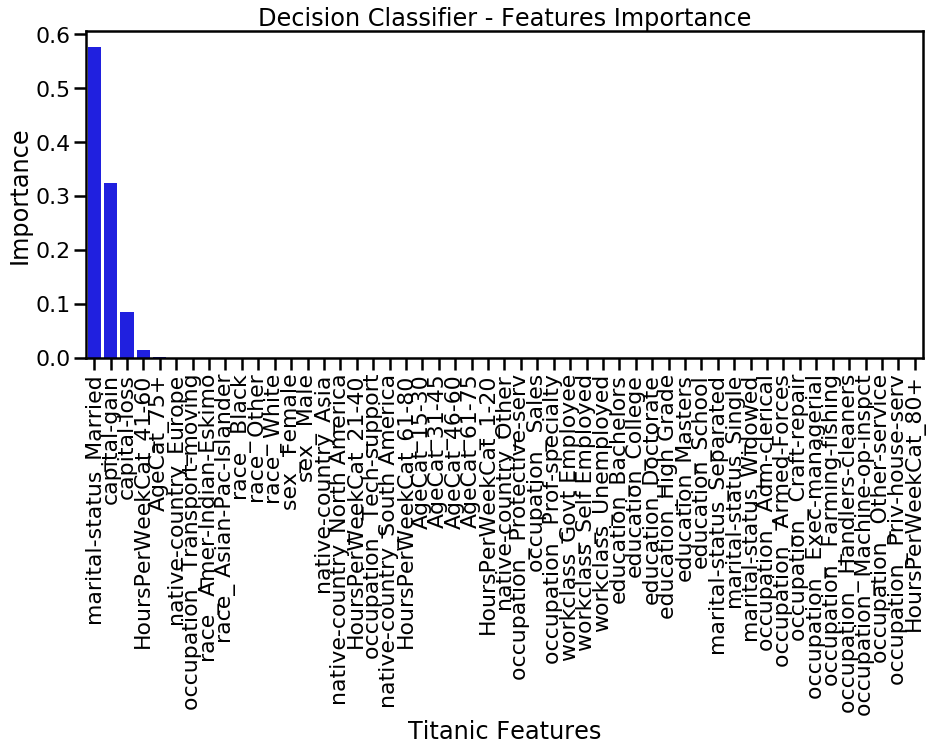

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Datset Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")
plt.show()

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf_rf = RandomForestClassifier(random_state=100)

In [40]:
clf_rf.fit(xtrain, ytrain)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [41]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

## Task 14: Print Classification Report for Random Forest

In [102]:
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred).ravel()
rf_specificity= tn/(tn+fp)
rf_specificity

0.9215131933225633

In [42]:
from sklearn.metrics import classification_report

In [43]:
classification_rf=classification_report(ytest,rf_pred, output_dict=True)
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7428
           1       0.71      0.60      0.65      2341

    accuracy                           0.85      9769
   macro avg       0.79      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



## ROC Curve for Random Forest

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [45]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

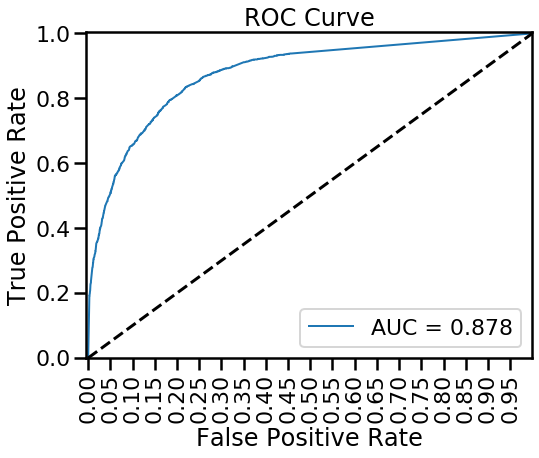

In [46]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

## Features Importance

In [47]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [48]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [49]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

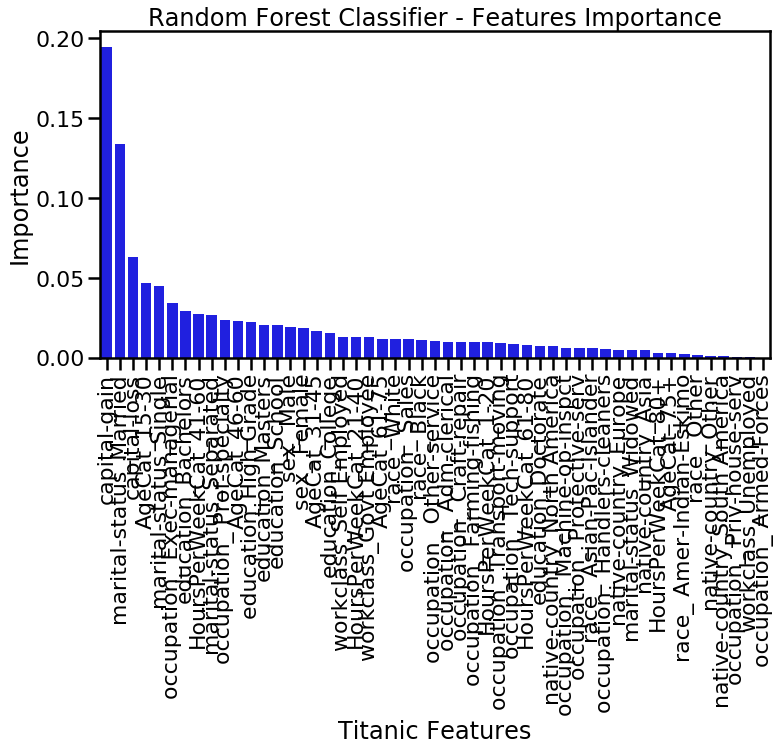

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Dataset Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_, 
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 63},
 0.8551684801684801)

#### So we found 'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 63 as optimum parameters

In [94]:
param_grid2 = {"n_estimators" : [54,57,60,63,66,67,70,73],
           "max_depth" : [10,11,12,13,14,15,16,17,18,19,20],
           "min_samples_leaf" : [3,4,5,6]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='accuracy',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 63},
 0.8558704808704809)

## Tuned Random Forest

In [95]:
RF_cv2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=63,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [96]:
RF_grid = RF_cv2.best_estimator_

In [97]:
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=63,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [98]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t=RF_grid.predict_proba(xtest)[:,1]

### Task 19: Print Classification Report for Tuned Random Forest

In [99]:
classification_rf_t=classification_report(ytest,rf_pred_t, output_dict=True)
print(classification_report(ytest, rf_pred_t))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7428
           1       0.78      0.56      0.65      2341

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



## ROC Curve for Tuned Random Forest

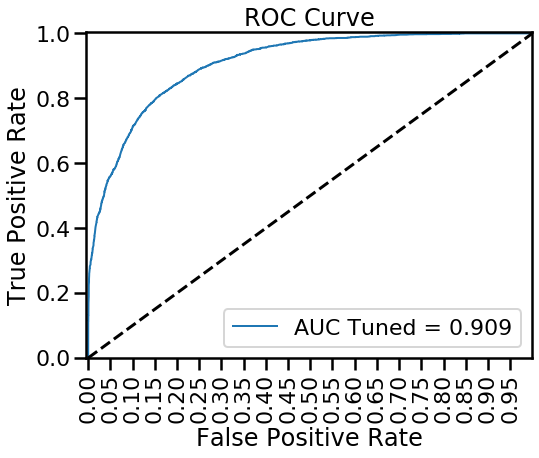

In [100]:

auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

## Hyperparameters Tuning Using Randomized Search

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
rf_rs = RandomForestClassifier(random_state=100)

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [63]:
random_grid1 = {"n_estimators" : n_estimators,
           "max_depth" : max_depth,
           "min_samples_split" :min_samples_split}

In [64]:
random_grid1

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10]}

In [65]:
rf_random = RandomizedSearchCV(estimator = rf_rs, param_distributions = random_grid1, n_iter = 50, cv = 5, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  26.9s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.8s remaining:    0.0s


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  26.4s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  24.9s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  22.2s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=  27.0s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=  43.1s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=  33.9s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=  36.4s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 ..

[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=  22.0s
[CV] n_estimators=890, min_samples_split=2, max_depth=40 .............
[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=  19.4s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  11.0s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  10.9s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  10.5s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  10.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=  10.3s
[CV] n_estimators=780, min_samples_split=10, max_depth=50 .....

[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  15.4s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  15.7s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  15.2s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  16.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=  15.7s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=   6.3s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=   6.3s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ...

[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   6.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   5.7s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   5.7s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  20.2s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  20.4s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  25.4s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=  35.9s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 ......

[CV]  n_estimators=340, min_samples_split=10, max_depth=100, total=  13.1s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=  14.3s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=  14.7s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=  15.0s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=  14.0s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=  13.3s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 .............
[CV]  n_estimators=670, min_samples_split=2, max_depth=90, total=  20.6s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 ....

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 63.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

## Selecting the best classifier

In [66]:
clf_rf_rand=rf_random.best_estimator_

In [67]:
clf_rf_rand.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=560,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [68]:
pred_rf_rand=clf_rf_rand.predict(xtest)

In [69]:
prb_rf_rand=clf_rf_rand.predict_proba(xtest)[:,1]

## Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred_rf_rand)
confusion_matrix(ytest, pred_rf_rand).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, pred_rf_rand).ravel()
conf_matrix=pd.DataFrame({"pred 50K+":[tp,fp],"pred upto 50K":[fn,tn]},index=["Actual 50K+","Actual upto 50K"])
conf_matrix

,pred 50K+,pred upto 50K
Actual 50K+,1228,1113
Actual upto 50K,296,7132


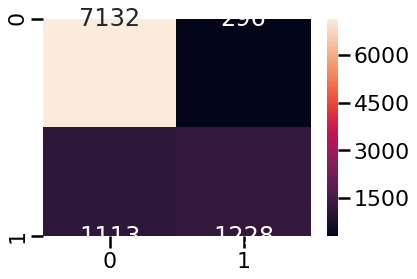

In [92]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest, pred_rf_rand), annot= True, fmt='g')
plt.show()

## Print the Classification Report of Tuned Random Forest through Randomized Search

In [103]:
tn, fp, fn, tp = confusion_matrix(ytest, pred_rf_rand).ravel()
rf_r_specificity= tn/(tn+fp)
rf_r_specificity

0.9601507808292946

In [70]:
classification_rf_r=classification_report(ytest,pred_rf_rand, output_dict=True)
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7428
           1       0.81      0.52      0.64      2341

    accuracy                           0.86      9769
   macro avg       0.84      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769



## ROC Curve

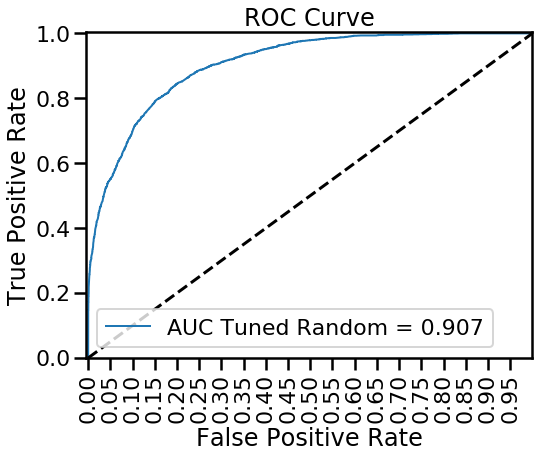

In [71]:
auc_rf_r=roc_auc_score(ytest,prb_rf_rand)
fpr,tpr,threshold=roc_curve(ytest,prb_rf_rand)
plot_roc_curve(fpr,tpr,label='AUC Tuned Random = %0.3f'% auc_rf_r)

<Figure size 432x288 with 0 Axes>

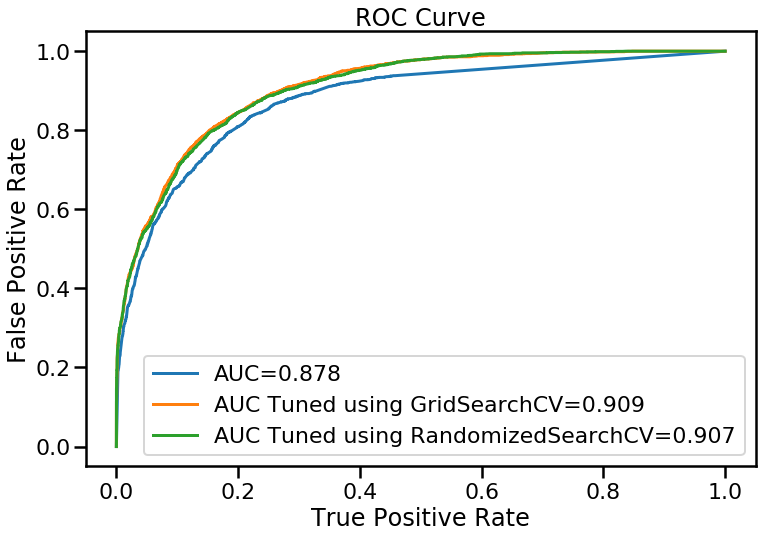

In [101]:
from sklearn import metrics
plt.figure(0).clf()
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')

fpr, tpr, threshold = metrics.roc_curve(ytest, rf_pred_prb)
auc = metrics.roc_auc_score(ytest, rf_pred_prb)
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))


fpr, tpr, threshold = metrics.roc_curve(ytest, rf_pred_prb_t)
auc = metrics.roc_auc_score(ytest, rf_pred_prb_t)
plt.plot(fpr,tpr,label="AUC Tuned using GridSearchCV="+str(round(auc,3)))


fpr, tpr, threshold = metrics.roc_curve(ytest, prb_rf_rand)
auc = metrics.roc_auc_score(ytest, prb_rf_rand)
plt.plot(fpr,tpr,label="AUC Tuned using RandomizedSearchCV="+str(round(auc,3)))

plt.legend(loc=0)

## Ada Boost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [73]:
pred_clf_adb=clf_adb.predict(xtest)
adb_pred_prb=clf_adb.predict_proba(xtest)[:,1]

## Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred_clf_adb)
confusion_matrix(ytest, pred_clf_adb).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, pred_clf_adb).ravel()
conf_matrix=pd.DataFrame({"pred 50K+":[tp,fp],"pred upto 50K":[fn,tn]},index=["Actual 50K+","Actual upto 50K"])
conf_matrix

,pred 50K+,pred upto 50K
Actual 50K+,1420,921
Actual upto 50K,497,6931


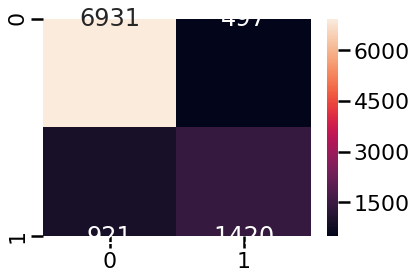

In [106]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest, pred_clf_adb), annot= True, fmt='g')
plt.show()

## Print Classification Report for Ada Boost

In [107]:
classification_adb=classification_report(ytest,pred_clf_adb, output_dict=True)
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7428
           1       0.74      0.61      0.67      2341

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



## ROC Curve

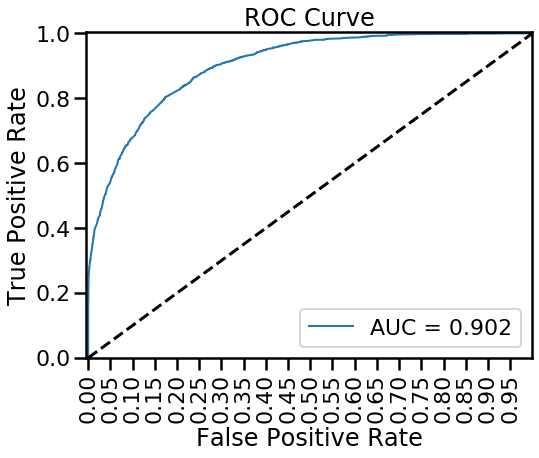

In [108]:
auc_adb=roc_auc_score(ytest,adb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,adb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_adb)

## XGBoost
### Extreme Gradient Boosting Algorithm

In [76]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [77]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

## Print Classification Report of XGBoost

## Confusion Matrix

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, xgb_pred)
confusion_matrix(ytest, xgb_pred).ravel() 
tn, fp, fn, tp = confusion_matrix(ytest, xgb_pred).ravel()
conf_matrix=pd.DataFrame({"pred 50K+":[tp,fp],"pred upto 50K":[fn,tn]},index=["Actual 50K+","Actual upto 50K"])
conf_matrix

,pred 50K+,pred upto 50K
Actual 50K+,1470,871
Actual upto 50K,458,6970


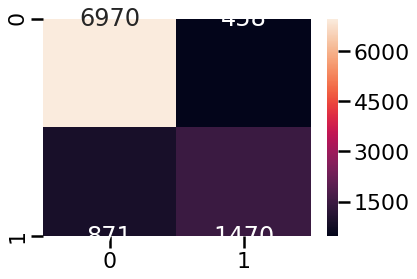

In [110]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest, xgb_pred), annot= True, fmt='g')
plt.show()

In [78]:
classification_xgb=classification_report(ytest,xgb_pred, output_dict=True)
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7428
           1       0.76      0.63      0.69      2341

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



## ROC Curve

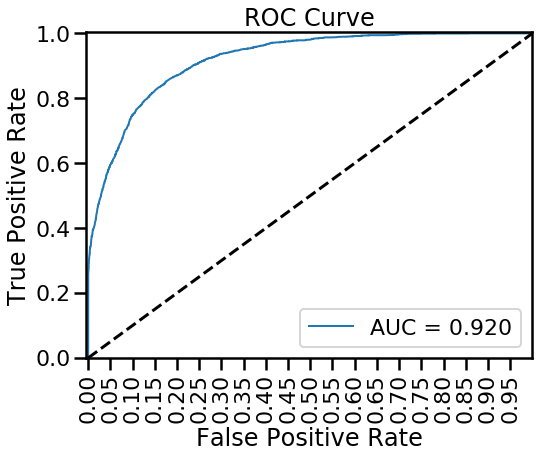

In [111]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

## Comparison

In [80]:
#comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
#                 "Accuracy":[accuracy_dt,accuracy_rf,accuracy_rf_t,accuracy_rf_r,accuracy_xgb,accuracy_adb],
#                 "Precision":[precision_dt,precision_rf,precision_rf_t,precision_rf_r,precision_xgb,precision_adb],
#                 "Recall":[recall_dt,recall_rf,recall_rf_t,recall_rf_r,recall_xgb,recall_adb],
#                 "AUC":[auc_dt,auc_rf,auc_rf_t,auc_rf_r,auc_xgb,auc_adb],
#                 "F1 Score":[dt_f1,rf_f1,rf_t_f1,f1_rf_r,xgb_f1,f1_adb]
#                }

In [81]:
#comparison=pd.DataFrame(comparison_dict)
#comparison.sort_values(['Recall','Accuracy', 'AUC'], ascending=False)

In [82]:
print(round(classification_adb['0']['precision'],2))
print(round(classification_adb['1']['precision'],2))
print(round(classification_adb['0']['recall'],2))
print(round(classification_adb['1']['recall'],2))
print(round(classification_adb['0']['f1-score'],2))
print(round(classification_adb['1']['f1-score'],2))
print(round(classification_adb['accuracy'],2))


0.88
0.74
0.93
0.61
0.91
0.67
0.85


In [118]:
comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Precision[0]":[round(classification_dt['0']['precision'],2),round(classification_rf['0']['precision'],2),round(classification_rf_t['0']['precision'],2),round(classification_rf_r['0']['precision'],2),round(classification_xgb['0']['precision'],2),round(classification_adb['0']['precision'],2)],
                 "Precision[1]":[round(classification_dt['1']['precision'],2),round(classification_rf['1']['precision'],2),round(classification_rf_t['1']['precision'],2),round(classification_rf_r['1']['precision'],2),round(classification_xgb['1']['precision'],2),round(classification_adb['1']['precision'],2)],
                 "recall[0]":[round(classification_dt['0']['recall'],2),round(classification_rf['0']['recall'],2),round(classification_rf_t['0']['recall'],2),round(classification_rf_r['0']['recall'],2),round(classification_xgb['0']['recall'],2),round(classification_adb['0']['recall'],2)],
                 "recall[1]":[round(classification_dt['1']['recall'],2),round(classification_rf['1']['recall'],2),round(classification_rf_t['1']['recall'],2),round(classification_rf_r['1']['recall'],2),round(classification_xgb['1']['recall'],2),round(classification_adb['1']['recall'],2)],
                 "F1 Score[0]":[round(classification_dt['0']['f1-score'],2),round(classification_rf['0']['f1-score'],2),round(classification_rf_t['0']['f1-score'],2),round(classification_rf_r['0']['f1-score'],2),round(classification_xgb['0']['f1-score'],2),round(classification_adb['0']['f1-score'],2)],
                 "F1 Score[1]":[round(classification_dt['1']['f1-score'],2),round(classification_rf['1']['f1-score'],2),round(classification_rf_t['1']['f1-score'],2),round(classification_rf_r['1']['f1-score'],2),round(classification_xgb['1']['f1-score'],2),round(classification_adb['1']['f1-score'],2)],
                 "Accuracy":[round(classification_dt['accuracy'],2),round(classification_rf['accuracy'],2),round(classification_rf_t['accuracy'],2),round(classification_rf_r['accuracy'],2),round(classification_xgb['accuracy'],2),round(classification_adb['accuracy'],2)],
                 "AUC":[round(auc_dt,2),round(auc_rf,2),round(auc_rf_t,2),round(auc_rf_r,2),round(auc_xgb,2),round(auc_adb,2)],
                }
comparison=pd.DataFrame(comparison_dict)
comparison.sort_values(['AUC', 'F1 Score[1]', 'Accuracy'], ascending=False)

,Algorithm,Precision[0],Precision[1],recall[0],recall[1],F1 Score[0],F1 Score[1],Accuracy,AUC
4,XGBoost,0.89,0.76,0.94,0.63,0.91,0.69,0.86,0.92
2,Tuned Random Forest(Grid),0.87,0.78,0.95,0.56,0.91,0.65,0.86,0.91
3,Tuned Random Forest(Random),0.87,0.81,0.96,0.52,0.91,0.64,0.86,0.91
5,Ada Boost,0.88,0.74,0.93,0.61,0.91,0.67,0.85,0.90
1,Random Forest,0.88,0.71,0.92,0.60,0.90,0.65,0.85,0.88
0,Decision Tree,0.81,0.94,0.99,0.27,0.89,0.43,0.82,0.83
